In [ ]:
#libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

#functions
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
#Using pandas to read datasets stored in the same foldeer
data=pd.read_csv('train.csv') #data for training
pdata=pd.read_csv('test.csv') #data for predictions

In [ ]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Missing Values
print('Shape of train data:', data.shape)
print('Shape if we drop missing values from train data:', data.dropna(how='any').shape )
print('Shape of prediction data:', pdata.shape)
print('Shape if we drop missing values from prediction data:', pdata.dropna(how='any').shape )
# Conclusion : Both datasets don't have missing values in them.

Shape of train data: (42000, 785)
Shape if we drop missing values from train data: (42000, 785)
Shape of prediction data: (28000, 784)
Shape if we drop missing values from prediction data: (28000, 784)


In [ ]:
#Seperating data and label values
x=data.iloc[:,1:] #independent variables
Y=data.iloc[:,0] #dependent variable

In [ ]:
#Creating test and train size batches
x_train, x_test, Y_train, Y_test= train_test_split(x, Y, test_size=0.2, random_state=4)

In [ ]:
#Call Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)

In [ ]:
#fit the model
rf.fit(x_train, Y_train)

RandomForestClassifier()

In [ ]:
#Prediction on test data
pred=rf.predict(x_test)
pred

array([0, 4, 0, ..., 0, 3, 1])

In [ ]:
#checking prediction accuracy
s=Y_test.values
#calculating number of correctly predicted values
count=0
for i in range(len(pred)):
    if pred[i]==s[i]:
        count+=1
count

8079

In [ ]:
#total values on which the prediction was run on
total_values=len(pred)
total_values

8400

In [ ]:
#Accuracy value
Accuracy=count/total_values
Accuracy

0.9617857142857142

In [ ]:
#Making predictions on test data
y_pred=rf.predict(pdata)

In [ ]:
#Creating data frame out of predictions
submission=pd.DataFrame({'ImageId':pdata.index,'Label':y_pred})
submission.ImageId=submission.ImageId.apply(lambda i:i+1) #lambda function for adjusting indices
#Saving Submmsion
submission.to_csv('submission.csv',index=False)
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [ ]:
#function for matching digits extracted from prediction data using pyplot and from predicted values using indices
def see_digit(i):
    print('Value Predicted by RandomForestClassifier():',submission['Label'][i])
    print('Actual value in the prediction data : ')
    a=pdata.iloc[i,0:].values
    a=a.reshape(28,28).astype('uint8')
    plt.imshow(a)
    plt.show()

Value Predicted by RandomForestClassifier(): 7
Actual value in the prediction data : 


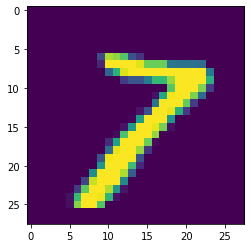

Value Predicted by RandomForestClassifier(): 5
Actual value in the prediction data : 


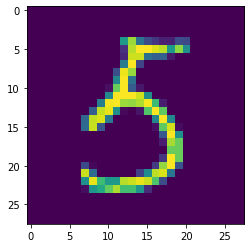

Value Predicted by RandomForestClassifier(): 2
Actual value in the prediction data : 


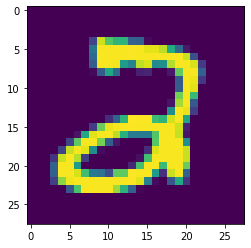

Value Predicted by RandomForestClassifier(): 8
Actual value in the prediction data : 


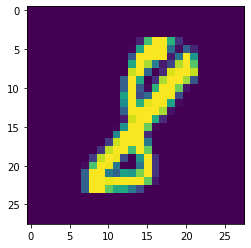

Value Predicted by RandomForestClassifier(): 8
Actual value in the prediction data : 


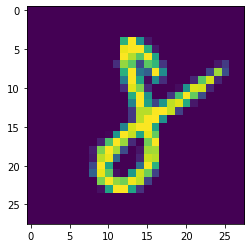

In [ ]:
#Checking for random predicted values by indices
indices=[234,454,873,123,654]
for i in indices: 
    see_digit(i)

Conclusion : Our model is fairly accurate.